# Jonathan Halverson
# Friday, May 6, 2016
# Numeric RDD operations

Spark provides routines for calculating description statistics on RDDs. Below we read in text file and create and RDD composed of the number of characters in each line.

In [33]:
lines = sc.textFile('text_file.md')
print lines.count()
print lines.first()

95
# Apache Spark


Create a numeric RDD:

In [60]:
num_chars = lines.map(len)
print num_chars.count()
print num_chars.first()
print num_chars.max()

95
14
120


Create a StatsCounter object which computes all descriptive statistics in a single pass:

In [37]:
stats_obj = num_chars.stats()

In [50]:
stats_obj.mean(), stats_obj.sum(), stats_obj.variance(), stats_obj.sampleVariance()

(34.3578947368421, 3263.9999999999995, 1108.0192797783932, 1119.8067189249718)

Note that one cannnot evaluate an action on an RDD inside of a transformation on an RDD. Here we store the mean and standard deviation before the filter:

In [47]:
mu = stats_obj.mean()
std = stats_obj.stdev()
inliers = num_chars.filter(lambda x: abs(x - mu < 2 * std))
print 'Number of outliers:', num_chars.count() - inliers.count()

Number of outliers: 2


The raw line lengths are plotted below. We see the two outliers at the far right:

(0, 40)

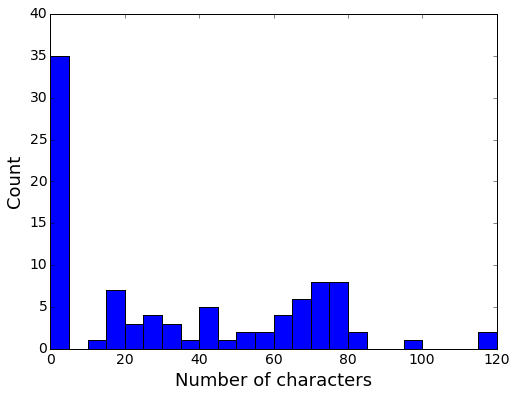

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

left, height = num_chars.histogram(buckets=range(0, 125, 5))
if sum(height) != num_chars.count(): print 'Warning: discordant counts'
plt.bar(left[:-1], height, width=5)
plt.xlabel('Number of characters')
plt.ylabel('Count')
plt.ylim(0, 40)